In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from Backtest import backtest_func
data = yf.download(tickers = '^GSPC', start = '2019-01-01',end = '2021-11-19')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4088740000
2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3721300000
2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3447460000
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3689370000


In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Open, length=15)
data['EMAF']=ta.ema(data.Open, length=20)
data['EMAM']=ta.ema(data.Open, length=100)
data['EMAS']=ta.ema(data.Open, length=150)

data["log(Open)"]=np.log(data["Open"])
#Target variable = log(price(t+1)-log(t))
data["Return_before"]=data["log(Open)"]-data["log(Open)"].shift(+1)
data["Return"]=data["log(Open)"].shift(-1)-data["log(Open)"]
# Class: 1 = positive return, 0 = negative return
data["Class"] = [1 if data.Return[i]>0 else 0 for i in range(len(data))]
# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,log(Open),Return_before,Return,Class
0,2861.179932,2884.399902,2847.419922,2881.770020,31.249372,2966.852030,2885.702403,2831.756479,7.958989,-0.012811,-0.000885,0
1,2858.649902,2892.169922,2825.709961,2883.979980,30.959715,2956.547065,2885.166710,2832.112684,7.958105,-0.000885,0.013054,1
2,2896.209961,2938.719971,2894.469971,2938.090088,39.830865,2950.800674,2885.385388,2832.961654,7.971158,0.013054,0.011774,1
3,2930.510010,2935.750000,2900.149902,2918.649902,46.550597,2948.868230,2886.278945,2834.253686,7.982932,0.011774,-0.008031,0
4,2907.070068,2907.580078,2873.139893,2882.699951,43.031811,2944.887453,2886.690650,2835.218141,7.974901,-0.008031,-0.009105,0
5,2880.719971,2943.310059,2877.050049,2926.320068,39.440911,2938.776264,2886.572419,2835.820814,7.965796,-0.009105,0.004651,1
6,2894.149902,2894.149902,2839.639893,2840.600098,42.080250,2934.526134,2886.722468,2836.593385,7.970447,0.004651,-0.016707,0
7,2846.199951,2856.669922,2825.510010,2847.600098,36.067068,2926.114117,2885.920042,2836.720624,7.953740,-0.016707,0.006493,1
8,2864.739990,2893.629883,2864.739990,2888.679932,39.640281,2920.268962,2885.500635,2837.091742,7.960233,0.006493,0.016871,1
9,2913.479980,2931.000000,2913.479980,2923.649902,47.849973,2919.622392,2886.054681,2838.103506,7.977104,0.016871,0.001896,1


In [363]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_set_scaled = sc.fit_transform(data)
data_set_scaled.shape[0]

array([[-1.21177792, -1.21256881, -1.18898032, ..., -1.1683697 ,
        -0.1494423 , -1.26633471],
       [-1.21611746, -1.1991774 , -1.22591358, ..., -0.14739357,
         1.04517381,  0.78968064],
       [-1.15169387, -1.11894969, -1.10893818, ...,  1.04581656,
         0.93546552,  0.78968064],
       ...,
       [ 1.92384151,  1.91212057,  1.91648132, ...,  0.55239612,
        -0.25438946, -1.26633471],
       [ 1.90689539,  1.94233351,  1.92764138, ..., -0.25221721,
         0.32984709,  0.78968064],
       [ 1.94476748,  1.91915247,  1.93613083, ...,  0.33133174,
        -0.08783699, -1.26633471]])

In [365]:
data_set_scaled.shape[0]

578

In [7]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
# Indpendent variables
# deleted range(8)
#Columns as an input = list
# 4,5,6,7,

list=[4,5,6,7,9]
for j in range(len(list)):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
            X[j].append(data_set_scaled[i-backcandles:i, list[j]])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-2])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

578
[[[-2.36539793 -1.01794694 -1.09700292 -1.15793615 -1.1683697 ]
  [-2.39116802 -1.03623011 -1.09807423 -1.15717291 -0.14739357]
  [-1.60192191 -1.04642542 -1.09763691 -1.15535382  1.04581656]
  ...
  [ 0.30466384 -1.04631876 -1.06253943 -1.09744824  0.01733703]
  [ 0.03273995 -1.03862221 -1.05883771 -1.09357651 -0.52188188]
  [ 0.01980797 -1.03178371 -1.0552386  -1.08977705 -0.09280496]]

 [[-2.39116802 -1.03623011 -1.09807423 -1.15717291 -0.14739357]
  [-1.60192191 -1.04642542 -1.09763691 -1.15535382  1.04581656]
  [-1.00408264 -1.04985398 -1.09584991 -1.15258537  0.93623739]
  ...
  [ 0.03273995 -1.03862221 -1.05883771 -1.09357651 -0.52188188]
  [ 0.01980797 -1.03178371 -1.0552386  -1.08977705 -0.09280496]
  [ 0.09684457 -1.02461137 -1.05147988 -1.08586247  0.09478357]]

 [[-1.60192191 -1.04642542 -1.09763691 -1.15535382  1.04581656]
  [-1.00408264 -1.04985398 -1.09584991 -1.15258537  0.93623739]
  [-1.317141   -1.05691672 -1.09502656 -1.15051883 -0.75915195]
  ...
  [ 0.01980797

In [367]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [368]:
len(X)

548

In [8]:
# split data into train test sets
# for our use case: 10 days
splitlimit = (len(X)-10)
#splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

488
(488, 30, 5)
(60, 30, 5)
(488, 1)
(60, 1)


In [370]:
len(data)-len(X_test)

518

In [371]:
splitlimit

488

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

#Change nr of inputs
lstm_input = Input(shape=(backcandles, len(list)), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=40, shuffle=True, validation_split = 0.1)

Epoch 1/40
30/30 [==============================] - 2s 26ms/step - loss: 1.2681 - val_loss: 0.2913
Epoch 2/40
30/30 [==============================] - 0s 13ms/step - loss: 1.2311 - val_loss: 0.2554
Epoch 3/40
30/30 [==============================] - 0s 12ms/step - loss: 1.2139 - val_loss: 0.2644
Epoch 4/40
30/30 [==============================] - 0s 13ms/step - loss: 1.2115 - val_loss: 0.2697
Epoch 5/40
30/30 [==============================] - 0s 12ms/step - loss: 1.2302 - val_loss: 0.2700
Epoch 6/40
30/30 [==============================] - 0s 11ms/step - loss: 1.2088 - val_loss: 0.2554
Epoch 7/40
30/30 [==============================] - 0s 11ms/step - loss: 1.2131 - val_loss: 0.2552
Epoch 8/40
30/30 [==============================] - 0s 12ms/step - loss: 1.1964 - val_loss: 0.2654
Epoch 9/40
30/30 [==============================] - 0s 12ms/step - loss: 1.1871 - val_loss: 0.2453
Epoch 10/40
30/30 [==============================] - 0s 12ms/step - loss: 1.1864 - val_loss: 0.2406
Epoch 11/

In [12]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)

2/2 [==============================] - 0s 7ms/step


In [13]:
y_pred

array([[-0.17866792],
       [-0.07832561],
       [-0.06567562],
       [ 0.06555257],
       [-0.20735386],
       [-0.1866289 ],
       [-0.12087706],
       [-0.15060966],
       [-0.12791663],
       [-0.1505734 ],
       [-0.02419148],
       [-0.03494233],
       [-0.00739871],
       [ 0.21358258],
       [ 0.08500972],
       [ 0.33076143],
       [ 0.02921994],
       [ 0.18023404],
       [ 0.6484753 ],
       [ 0.5529087 ],
       [ 0.4416493 ],
       [ 0.12560359],
       [ 0.08122179],
       [ 0.18636785],
       [ 0.35269544],
       [ 0.6304636 ],
       [ 0.2861016 ],
       [ 0.6611148 ],
       [ 0.19138622],
       [ 0.58438957],
       [ 0.3506188 ],
       [ 0.01514935],
       [ 0.16362739],
       [ 0.40975454],
       [ 0.3965307 ],
       [ 0.3356473 ],
       [ 0.10646351],
       [-0.03101913],
       [ 0.17541504],
       [ 0.12116279],
       [ 0.12447991],
       [ 0.17185727],
       [ 0.11540663],
       [ 0.09105355],
       [-0.00395424],
       [ 0

In [17]:
threshold=0.05
decision=[0]*len(y_pred)
for i, yp in enumerate(y_pred):
    if yp< -threshold:
        decision[i]=-1
    elif yp > threshold:
        decision[i]=1
    else:
        decision[i]=0

In [18]:
decision

[-1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1]

In [22]:
decision[:5]

[-1, -1, -1, 1, -1]

day 0: cannot sell anything, inventory 0
day 1: cannot sell anything, inventory 0
day 2: cannot sell anything, inventory 0
day 3: buy 1 units at price 4513.759766, total balance 95486.240234
day 4, sell 1 units at price 4529.750000, total balance 100015.990234,
day 5: cannot sell anything, inventory 0
day 6: cannot sell anything, inventory 0
day 7: cannot sell anything, inventory 0
day 8: cannot sell anything, inventory 0
day 9: cannot sell anything, inventory 0
day 13: buy 1 units at price 4479.330078, total balance 95536.660156
day 14: buy 1 units at price 4447.490234, total balance 91089.169922
day 15: buy 1 units at price 4477.089844, total balance 86612.080078
day 17: buy 1 units at price 4402.950195, total balance 82209.129883
day 18: buy 1 units at price 4374.450195, total balance 77834.679688
day 19: buy 1 units at price 4367.430176, total balance 73467.249512
day 20: buy 1 units at price 4406.750000, total balance 69060.499512
day 21: buy 1 units at price 4438.040039, total ba

C:\Users\kimer\Downloads\Jupyter_LSTM\Backtest.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


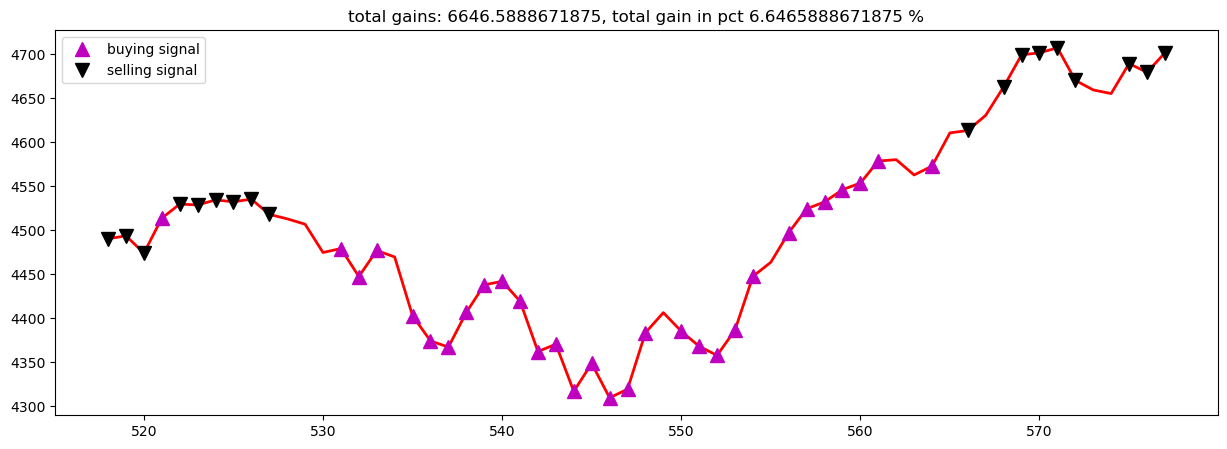

In [23]:
backtest_func(data[-len(y_test):],decision)

In [379]:

#np.savetxt("decision.csv",decision)

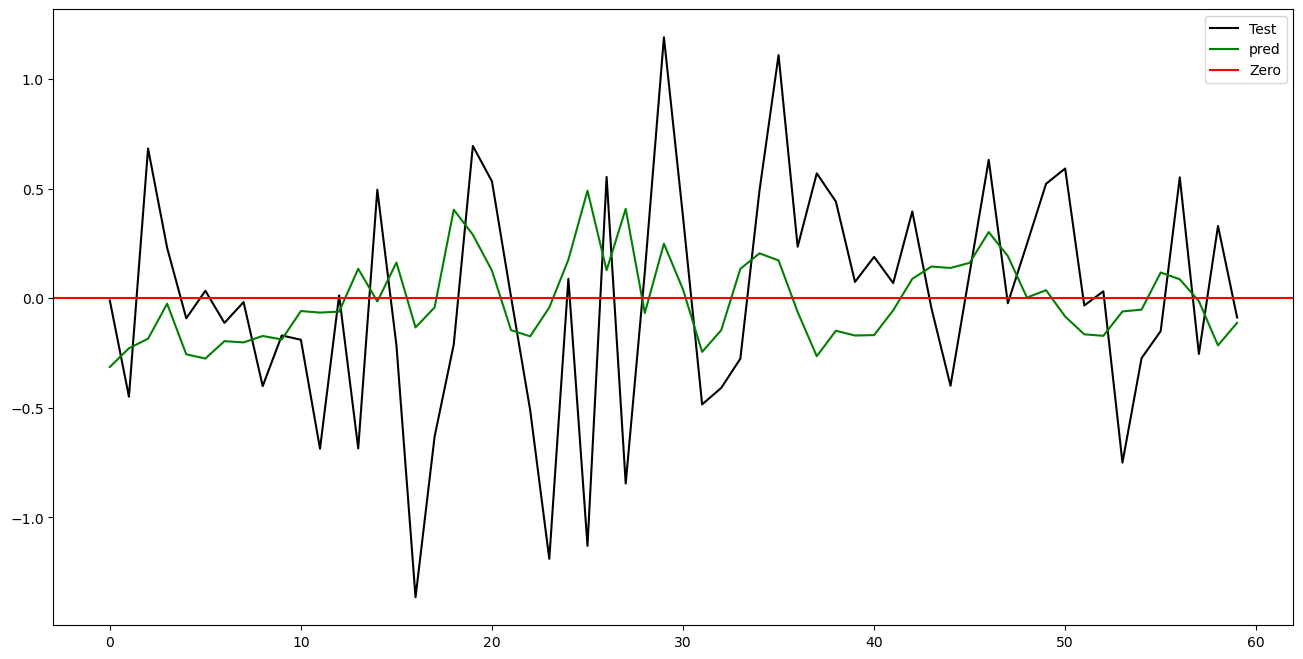

In [380]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.axhline(y = 0, color = 'r', linestyle = '-', label="Zero")
plt.legend()
plt.show()

In [381]:
# Evaluate results
sum((y_test>0)==(y_pred>0))/(len(y_test))

array([0.56666667])

In [382]:
y_test[0]

array([-0.01066084])

In [383]:
y_test

array([[-0.01066084],
       [-0.44922007],
       [ 0.68277372],
       [ 0.22946908],
       [-0.09160105],
       [ 0.03381049],
       [-0.11256728],
       [-0.01766565],
       [-0.40098664],
       [-0.16984899],
       [-0.18954765],
       [-0.6864402 ],
       [ 0.0129101 ],
       [-0.68502465],
       [ 0.49490823],
       [-0.21443495],
       [-1.36399876],
       [-0.63020726],
       [-0.21127347],
       [ 0.69455514],
       [ 0.5327988 ],
       [ 0.00513866],
       [-0.51040142],
       [-1.18876449],
       [ 0.08850575],
       [-1.12941568],
       [ 0.55301755],
       [-0.84510913],
       [ 0.11905613],
       [ 1.19007344],
       [ 0.37060403],
       [-0.48441905],
       [-0.40905917],
       [-0.27595542],
       [ 0.48975326],
       [ 1.10882864],
       [ 0.23473216],
       [ 0.56949383],
       [ 0.44091175],
       [ 0.07439565],
       [ 0.18845806],
       [ 0.06897524],
       [ 0.39563544],
       [-0.04498004],
       [-0.39947244],
       [ 0